In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("adult.csv")

In [5]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
data.shape

(48842, 15)

In [7]:
data.isna()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48838,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48839,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48840,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [10]:
data['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [11]:
data['marital-status'].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [12]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [13]:
data['relationship'].value_counts()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64

In [14]:
data['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [15]:
data['gender'].value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [16]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [17]:
data['workclass'].replace({"?":"Others"},inplace=True)

In [18]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [19]:
data['occupation'].replace({"?":"Others"},inplace=True)

In [20]:
data['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [21]:
data['native-country'].replace({"?":"Others"},inplace=True)

In [22]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Others                          857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [23]:
data['native-country'].replace({"Others":"Not Listed"},inplace=True)

In [24]:
data['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
Not Listed                      857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru         

In [25]:
data = data[data['workclass']!='Without-pay']
data = data[data['workclass']!='Never-worked']

In [26]:
data['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64

In [27]:
data = data[data['education']!='Preschool']
data = data[data['education']!='1st-4th']
data = data[data['education']!='5th-6th']

In [28]:
data['education'].value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64

In [29]:
data.drop(columns=['education'],inplace=True)
data.drop(columns=['fnlwgt'],inplace=True)

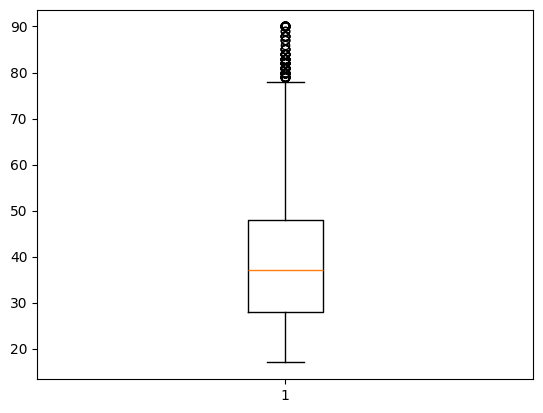

In [30]:
plt.boxplot(data['age'])
plt.show()

In [31]:
data = data[(data['age']<=75)&(data['age']>=17)]

In [32]:
data

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [33]:
encoder = LabelEncoder()

In [34]:
data['workclass'] = encoder.fit_transform(data['workclass'])
data['marital-status'] = encoder.fit_transform(data['marital-status'])
data['occupation'] = encoder.fit_transform(data['occupation'])
data['relationship'] = encoder.fit_transform(data['relationship'])
data['race'] = encoder.fit_transform(data['race'])
data['gender'] = encoder.fit_transform(data['gender'])
data['native-country'] = encoder.fit_transform(data['native-country'])

In [35]:
data

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,9,4,0,3,4,1,0,0,20,39,<=50K


In [36]:
x = data.drop(columns=["income"])
y = data["income"]

In [37]:
x

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,7,4,6,3,2,1,0,0,40,39
1,38,3,9,2,4,0,4,1,0,0,50,39
2,28,1,12,2,11,0,4,1,0,0,40,39
3,44,3,10,2,6,0,2,1,7688,0,40,39
4,18,2,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,12,2,13,5,4,0,0,0,38,39
48838,40,3,9,2,6,0,4,1,0,0,40,39
48839,58,3,9,6,0,4,4,0,0,0,40,39
48840,22,3,9,4,0,3,4,1,0,0,20,39


In [38]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 47619, dtype: object

In [39]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.13793103, 0.5       , 0.25      , ..., 0.        , 0.39795918,
        0.95121951],
       [0.36206897, 0.5       , 0.41666667, ..., 0.        , 0.5       ,
        0.95121951],
       [0.18965517, 0.16666667, 0.66666667, ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.70689655, 0.5       , 0.41666667, ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.5       , 0.41666667, ..., 0.        , 0.19387755,
        0.95121951],
       [0.60344828, 0.66666667, 0.41666667, ..., 0.        , 0.39795918,
        0.95121951]], shape=(47619, 12))

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [41]:
x_train

array([[0.48275862, 1.        , 0.5       , ..., 0.        , 0.39795918,
        0.95121951],
       [0.18965517, 0.5       , 0.5       , ..., 0.        , 0.39795918,
        0.65853659],
       [0.65517241, 0.5       , 0.25      , ..., 0.        , 0.39795918,
        0.95121951],
       ...,
       [0.37931034, 0.5       , 0.41666667, ..., 0.        , 0.60204082,
        0.95121951],
       [0.32758621, 0.5       , 0.75      , ..., 0.        , 0.39795918,
        0.95121951],
       [0.0862069 , 0.5       , 0.41666667, ..., 0.        , 0.39795918,
        0.95121951]], shape=(38095, 12))

In [42]:
x_test

array([[0.43103448, 1.        , 0.5       , ..., 0.        , 0.47959184,
        0.95121951],
       [0.55172414, 0.5       , 0.66666667, ..., 0.        , 0.34693878,
        0.95121951],
       [0.82758621, 0.33333333, 0.5       , ..., 0.        , 0.44897959,
        0.95121951],
       ...,
       [0.65517241, 0.5       , 0.41666667, ..., 0.        , 0.39795918,
        0.95121951],
       [0.5       , 0.5       , 0.25      , ..., 0.        , 0.39795918,
        0.95121951],
       [0.25862069, 0.5       , 0.66666667, ..., 0.        , 0.5       ,
        0.95121951]], shape=(9524, 12))

In [43]:
y_train

18532    <=50K
28997    <=50K
28919    <=50K
1315     <=50K
11792    <=50K
         ...  
16686     >50K
15564    <=50K
31836     >50K
999      <=50K
18096    <=50K
Name: income, Length: 38095, dtype: object

In [44]:
y_test

38886    <=50K
9614     <=50K
5936      >50K
11921    <=50K
14629    <=50K
         ...  
19417    <=50K
8182      >50K
29537    <=50K
8423     <=50K
31878    <=50K
Name: income, Length: 9524, dtype: object

In [45]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
predict = knn.predict(x_test)
predict

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      shape=(9524,), dtype=object)

In [46]:
accuracy_score(y_test,predict)

0.8270684586308273

In [47]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predict1 = lr.predict(x_test)
predict1

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      shape=(9524,), dtype=object)

In [48]:
accuracy_score(y_test,predict1)

0.8220285594288115

In [49]:
clf = MLPClassifier(solver='adam',hidden_layer_sizes=(5,2),random_state=2,max_iter=2000)
clf.fit(x_train,y_train)
predict2 = clf.predict(x_test)
predict2

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      shape=(9524,), dtype='<U5')

In [50]:
accuracy_score(y_test,predict2)

0.8488030239395212

In [51]:
import pickle
pickle.dump(clf, open('MLP_model.pkl', 'wb'))